In [4]:
import datetime
import numpy as np
import pandas as pd
import random

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

%matplotlib inline

import vasu
import vasu_strategy as strategy

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [6]:
STOCK_NAME = 'MINDTREE'
STOCK_PRICE_FILE = './../database/532819.csv'

In [7]:
price_data = pd.read_csv(STOCK_PRICE_FILE,index_col = 0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()

In [8]:
sample_data = price_data.loc[datetime.date(year=2018,month=7,day=1):datetime.date(year=2018,month=11,day=27)]

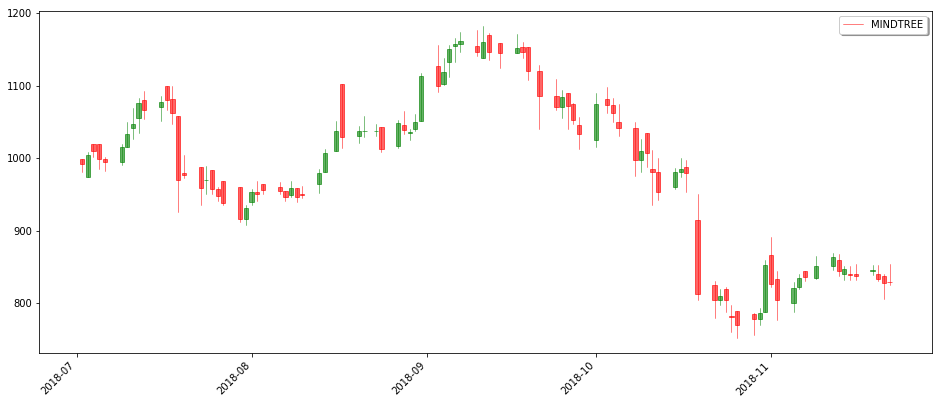

In [9]:
vasu.plot_candlestic(sample_data,STOCK_NAME)

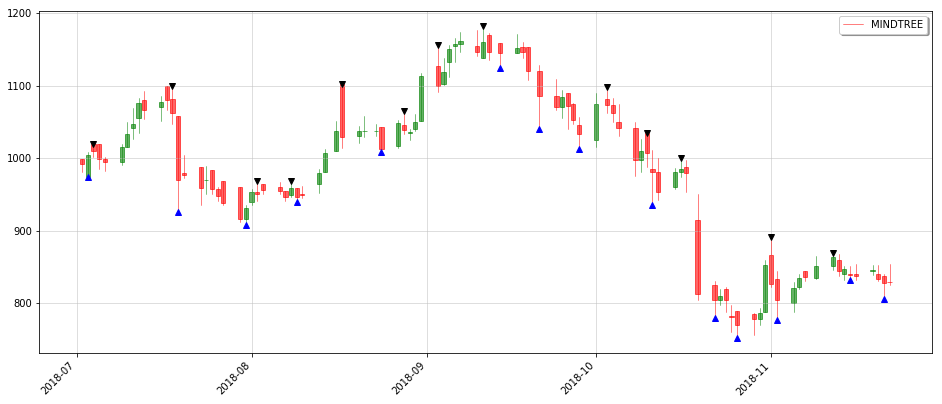

In [10]:
peak_indices = vasu.get_peak_indices(sample_data)
trough_indices = vasu.get_trough_indices(sample_data)
vasu.plot_candlestic_with_extrema(sample_data,peak_indices,trough_indices,STOCK_NAME)

In [11]:
trend_data = vasu.get_trend_data(sample_data)
train_data,test_data = vasu.split_data(trend_data)

In [41]:
signal_dict = strategy.detect_bearish_continuation(train_data,test_data)
benchamark_date = signal_dict['benchmark_date']
benchamark_price = signal_dict['benchmark_price']
signal_date = signal_dict['entry_date']
benchmark_data = train_data.loc[benchamark_date:].head(1)
signal_data = test_data.loc[signal_date:]

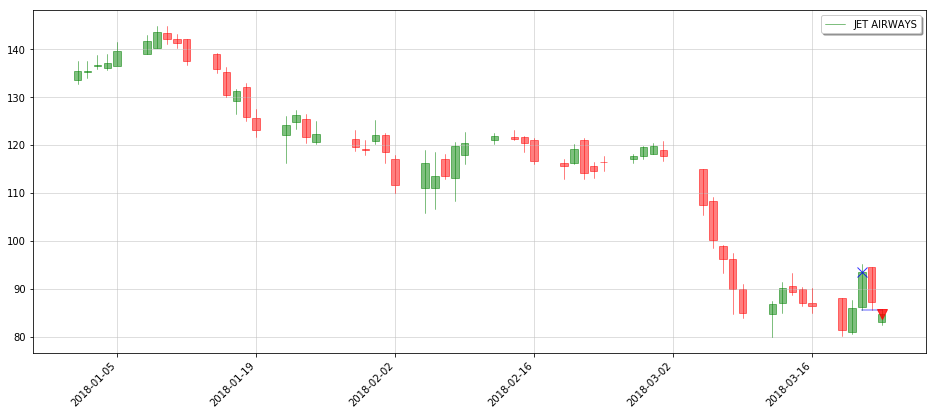

In [45]:
fig, ax = plt.subplots(figsize = (16,7))
fig.subplots_adjust(bottom=0.2)

quotes = zip(mdates.date2num(train_data.index.to_pydatetime()),train_data[u'Open Price'], 
                             train_data[u'High Price'],train_data[u'Low Price'], train_data[u'Close Price'])
candlestick_ohlc(ax,quotes,width=0.75,colorup='green',colordown='red' ,alpha=0.5)

quotes = zip(mdates.date2num(test_data.index.to_pydatetime()),test_data[u'Open Price'], 
                                 test_data[u'High Price'],test_data[u'Low Price'], test_data[u'Close Price'])
candlestick_ohlc(ax,quotes,width=0.75,colorup='green',colordown='red' ,alpha=0.5)
    
full_data = pd.concat([train_data,test_data])
benchamark_to_end_data = full_data.loc[benchamark_date:].copy()
benchamark_to_end_data['benchmark price'] = benchamark_price
benchmark_series = benchamark_to_end_data['benchmark price']
plt.plot(benchmark_series, "-", color='blue', alpha = 0.4,markersize=20)

plt.plot(benchmark_data['Close Price'], "x", color='b',markersize=10, alpha = 0.8)
plt.plot(signal_data['Close Price'], "v", color='red',markersize=10,alpha = 0.8)

ax.xaxis_date()
ax.legend([STOCK_NAME],loc='upper right', shadow=True, fancybox=True)
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
plt.show()